# Web scraping with BeautifulSoup

Web scraping is programmatically collecting information from various websites. While there are many libraries and frameworks in various languages that can extract web data, Python has long been a popular choice because of its plethora of options for web scraping.

# Ethical web scraping
Before choosing to engage in web scraping, you always have to consider some things:
1. Many websites have a Terms of Use which may not allow scraping. We must respect websites that do not want to be scraped.
2. Is there an API available already? If so, there's no need for us to write a scraper. APIs are created to provide access to data in a controlled way as defined by the owners of the data, so we prefer to use APIs if they're available.
3. Making requests to a website can cause a toll on a website's performance. A web scraper that makes too many requests can be as debilitating. We must scrape responsibly so we won't cause any disruption to the regular functioning of the website.

If you have doubts about the ethics of scraping some website, please consult with me.


# Scraping from Wikipedia
We're going to scrape some information from Wikipedia, which has a simple page layout with a consistent template.

For web scraping we're going to need two libraries: [requests](https://requests.readthedocs.io/en/master/) and [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/). BeautifulSoup is what we use to actually navigate and parse the page that we're scraping. We'll import the `time` library too. This will allow us to `time.sleep(5)` so that we don't overload anyone's servers. 

We will talk a little about HTML and CSS - you need to know more about these if you want to get good at web scraping. Here's a good point to start: [What are HTML and CSS?](https://html.com/) 

If you're looking for a quick crash course in developer tools for HTML and CSS, check out this YouTube video.

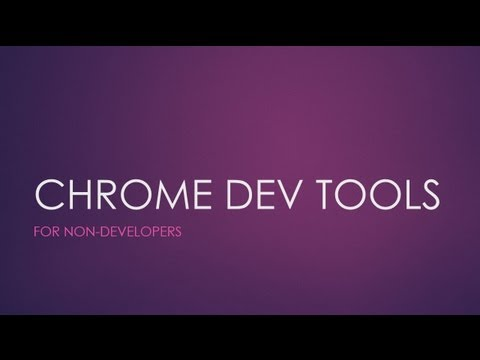

In [164]:
from IPython.display import YouTubeVideo
YouTubeVideo('FQKvro1Wz-E', width=640, height=360)

In [ ]:
# !pip install beautifulsoup4

In [25]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd

### For this exercise, we will scrape all the citations on the Wikipedia "Data Science" page

First we use requests to make a `.get` request to the page. First, hav a look at what's on the [Data science](https://en.wikipedia.org/wiki/Data_science) Wikipedia page. Next, we'll access this page using a GET request through the `requests` library.

In [26]:
r = requests.get('https://en.wikipedia.org/wiki/Data_science')

We now have an .html object. There is no .html method in the requests library (like for json), but BeautifulSoup will help us get there. First, extract the html string:

In [27]:
source = r.text
source

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Data science - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"2488271c-364f-4513-9742-83144321ab68","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1087223604,"wgRevisionId":1087223604,"wgArticleId":35458904,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Use dmy dates from August 2021","Information science","Computer occupations","

Neat! If you visit the Data Science Wikipedia page, right click with your mouse and click "View source" - it's the same thing! 

<img src="../../Img/page_source.gif" alt="source" style="width: 400px;"/>

Now we convert it into a BeautifulSoup object that makes navigating the HTML tree much easier.

Note that Beautiful Soup offers a number of ways to customize how the parser treats incoming HTML and XML. We are using the `html5` parser here, but we could use [different ones](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#differences-between-parsers) as well. It all depends on the website you're trying to scrape.

In [165]:
soup = BeautifulSoup(source, 'html5lib')
print(type(soup))

<class 'bs4.BeautifulSoup'>


Then, use the `.prettify()` method to look at the HTML, and even get a slice of it. Let's take a look at what we have:

In [166]:
print(soup.prettify()[:2000])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Data science - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"2488271c-364f-4513-9742-83144321ab68","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1087223604,"wgRevisionId":1087223604,"wgArticleId":35458904,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Use dmy dates from August 2021","Information science","Computer oc

Let's use BeautifulSoup functions to find things on a page, such as:

1. HTML tags
2. HTML Attributes
3. CSS Selectors

Let's search first for **HTML tags**. 

The function `find_all` searches the `soup` tree to find all the elements with a particular HTML tag, and returns a list of all those elements. Let's search for all of the [`a` tags](https://www.w3schools.com/tags/tag_a.asp) (i.e., hyperlinks).

In [167]:
soup.find_all("a")

[<a id="top"></a>,
 <a class="mw-jump-link" href="#mw-head">Jump to navigation</a>,
 <a class="mw-jump-link" href="#searchInput">Jump to search</a>,
 <a href="/wiki/Information_science" title="Information science">information science</a>,
 <a class="image" href="/wiki/File:PIA23792-1600x1200(1).jpg"><img alt="" class="thumbimage" data-file-height="1200" data-file-width="1600" decoding="async" height="165" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/45/PIA23792-1600x1200%281%29.jpg/220px-PIA23792-1600x1200%281%29.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/45/PIA23792-1600x1200%281%29.jpg/330px-PIA23792-1600x1200%281%29.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/45/PIA23792-1600x1200%281%29.jpg/440px-PIA23792-1600x1200%281%29.jpg 2x" width="220"/></a>,
 <a class="internal" href="/wiki/File:PIA23792-1600x1200(1).jpg" title="Enlarge"></a>,
 <a href="/wiki/Comet_NEOWISE" title="Comet NEOWISE">Comet NEOWISE</a>,
 <a href="/wiki/Astronomical_survey

Since the `.find_all()` method is used so frequently, there is a shortcut for it. You can just treat the soup object itself as a function, and pass it the tag you're looking for as an argument.

So `soup.find_all('a')` is the same as `soup('a')`:

In [168]:
soup.find_all('a') == soup('a')

True

You probably noticed that `.find_all()` returned a lot of elements, most of which we might not want. One way to narrow down our search is to specify that we're only looking for elements that have a certain CSS class. Alternatively we can use the `.select()` method. We pass an argument to the method that consists of the tag and the CSS class separated by a period. For instance, we can grab the title with the following CSS selector:

In [169]:
soup.select("h1.firstHeading")

[<h1 class="firstHeading mw-first-heading" id="firstHeading">Data science</h1>]

How are we getting all these tag and attribute names? Typically, you will want to go to a web page on your browser, right-click on an element you're interested in (such as the heading in the example above) and select "inspect" in order to see the HTML and CSS that makes up the web page. You can then also navigate to other elements in the HTML.

<img src="../../Img/inspect.gif" alt="inspect" style="width: 400px;"/>

# Scraping text

Inspecting the HTML, we can see there's a tag with an id called `bodyContent`, where all the main text of the article can be found. Let's retrieve it.

In [170]:
# This is an attribute - not a method :D
body = soup.find(id="mw-content-text")
body

<div class="mw-body-content mw-content-ltr" dir="ltr" id="mw-content-text" lang="en"><div class="mw-parser-output"><div class="shortdescription nomobile noexcerpt noprint searchaux" style="display:none">Interdisciplinary field of study focused on deriving knowledge and insights from data</div>
<style data-mw-deduplicate="TemplateStyles:r1033289096">.mw-parser-output .hatnote{font-style:italic}.mw-parser-output div.hatnote{padding-left:1.6em;margin-bottom:0.5em}.mw-parser-output .hatnote i{font-style:normal}.mw-parser-output .hatnote+link+.hatnote{margin-top:-0.5em}</style><div class="hatnote navigation-not-searchable" role="note">Not to be confused with <a href="/wiki/Information_science" title="Information science">information science</a>.</div>
<p class="mw-empty-elt">
</p>
<div class="thumb tright"><div class="thumbinner" style="width:222px;"><a class="image" href="/wiki/File:PIA23792-1600x1200(1).jpg"><img alt="" class="thumbimage" data-file-height="1200" data-file-width="1600" dec

In [171]:
type(body)

bs4.element.Tag

Once we identify elements, we want to access the information in a certain element. This usually means two things:

1. Text
2. Attributes

Here, our `body` variable here is a BeautifulSoup `Tag` object. This means it has a `text` attribute. Let's grab all the `p` (paragraph) tags from our resulting BeautifulSoup object and print these `text` attributes.

In [172]:
for t in body.find_all("p"):
    print(t.text)



Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data,[1][2] and apply knowledge and actionable insights from data across a broad range of application domains. Data science is related to data mining, machine learning and big data.

Data science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyse actual phenomena" with data.[3] It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge.[4] However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing because of th

# Scraping links 

Next, let's find all the places in the text where there is a link to another website. Using the `.find()` method, we can find all the links on the page that are within the main text. 

Note that we have a special beautifulSoup `Tag` object, meaning we can use its methods on our `text` variable as well. Let's use the `.attrs` attribute to see the attributes for the first `a` tag (i.e., the first hyperlink in this BeautifulSoup object). We can get that with indexing :)

In [173]:
first_link = body("a")[0].attrs
print(first_link)

{'href': '/wiki/Information_science', 'title': 'Information science'}


You'll notice that it looks a lot like a dictionary, so we can index it as such. Since we want the link, we can use the `href` attribute like a dictionary key to get the corresponding value.

In [174]:
first_link['href']

'/wiki/Information_science'

Knowing this, we can now iterate over all `a` tags and access them as dictionaries to retrieve the ["href" attribute](https://www.w3schools.com/tags/att_a_href.asp), which specifies the URL of the page the link goes to.

In [175]:
for line in text.find_all('a'):
    print(line['href'])

/wiki/Information_science
/wiki/File:PIA23792-1600x1200(1).jpg
/wiki/File:PIA23792-1600x1200(1).jpg
/wiki/Comet_NEOWISE
/wiki/Astronomical_survey
/wiki/Space_telescope
/wiki/Wide-field_Infrared_Survey_Explorer
/wiki/Interdisciplinary
/wiki/Scientific_method
/wiki/Algorithm
/wiki/Knowledge
/wiki/Unstructured_data
#cite_note-1
#cite_note-2
/wiki/Data_mining
/wiki/Machine_learning
/wiki/Big_data
/wiki/Statistics
/wiki/Data_analysis
/wiki/Informatics
/wiki/Scientific_method
/wiki/Phenomena
/wiki/Data
#cite_note-3
/wiki/Mathematics
/wiki/Computer_science
/wiki/Information_science
/wiki/Domain_knowledge
#cite_note-4
/wiki/Turing_Award
/wiki/Jim_Gray_(computer_scientist)
/wiki/Empirical_research
/wiki/Basic_research
/wiki/Computational_science
/wiki/Information_technology
/wiki/Information_explosion
#cite_note-TansleyTolle2009-5
#cite_note-BellHey2009-6
#cite_note-7
#Foundations
#Relationship_to_statistics
#Etymology
#Early_usage
#Modern_usage
#See_also
#References
/w/index.php?title=Data_sci

KeyError: 'href'

# Scraping references
Next, let's get the references one can find at the bottom of a Wikipedia page. Let's `find` the references part of the website first and save that to a new variable.

In [176]:
refs = soup.find("div", class_="reflist")
# or, using find_all: 
#refs = soup.find_all("div", class_="reflist")

Next, we'll `select` the first `reference-text` attribute.

*Note that in this case, we could either use `find_all` or `select`. Usage often depends on the use case. See [here](https://stackoverflow.com/questions/38028384/beautifulsoup-difference-between-find-and-select) if you want to learn more.*

In [177]:
first_citation = refs.select("span.reference-text")[0]
# or, using find_all
#first_citation = refs.find_all("span", class_="reference-text")[0]

first_citation


<span class="reference-text"><style data-mw-deduplicate="TemplateStyles:r1067248974">.mw-parser-output cite.citation{font-style:inherit;word-wrap:break-word}.mw-parser-output .citation q{quotes:"\"""\"""'""'"}.mw-parser-output .citation:target{background-color:rgba(0,127,255,0.133)}.mw-parser-output .id-lock-free a,.mw-parser-output .citation .cs1-lock-free a{background:linear-gradient(transparent,transparent),url("//upload.wikimedia.org/wikipedia/commons/6/65/Lock-green.svg")right 0.1em center/9px no-repeat}.mw-parser-output .id-lock-limited a,.mw-parser-output .id-lock-registration a,.mw-parser-output .citation .cs1-lock-limited a,.mw-parser-output .citation .cs1-lock-registration a{background:linear-gradient(transparent,transparent),url("//upload.wikimedia.org/wikipedia/commons/d/d6/Lock-gray-alt-2.svg")right 0.1em center/9px no-repeat}.mw-parser-output .id-lock-subscription a,.mw-parser-output .citation .cs1-lock-subscription a{background:linear-gradient(transparent,transparent),ur

In [178]:
# check out its type
print(type(first_citation))

<class 'bs4.element.Tag'>


If we want to get the link to this citation, we just have to navigate to it. We can again find whatever `a` elements are in this tag, just like we did before.

In [179]:
# Find the "a" elements
print(first_citation("a"))

[<a class="external text" href="http://cacm.acm.org/magazines/2013/12/169933-data-science-and-prediction/fulltext" rel="nofollow">"Data science and prediction"</a>, <a class="mw-redirect" href="/wiki/Doi_(identifier)" title="Doi (identifier)">doi</a>, <a class="external text" href="https://doi.org/10.1145%2F2500499" rel="nofollow">10.1145/2500499</a>, <a class="mw-redirect" href="/wiki/S2CID_(identifier)" title="S2CID (identifier)">S2CID</a>, <a class="external text" href="https://api.semanticscholar.org/CorpusID:6107147" rel="nofollow">6107147</a>, <a class="external text" href="https://web.archive.org/web/20141109113411/http://cacm.acm.org/magazines/2013/12/169933-data-science-and-prediction/fulltext" rel="nofollow">Archived</a>]


As you can see, this returns a list. 
Note that we have a special beautifulSoup "Tag" object. Let's use the `.attrs` attribute to see the attributes for the first `a` tag (using indexing).

In [180]:
# Get the first one
print(first_citation("a")[0])

<a class="external text" href="http://cacm.acm.org/magazines/2013/12/169933-data-science-and-prediction/fulltext" rel="nofollow">"Data science and prediction"</a>


Since we want the link, we can use the `href` attribute again to get the corresponding value.

In [181]:
print(first_citation("a")[0]['href'])

http://cacm.acm.org/magazines/2013/12/169933-data-science-and-prediction/fulltext


Now, get all the links contained in the references and add them to a list:

In [182]:
# make accumulator list
refs_list = []

# start at the endnotes
references = soup.select("span.reference-text")

# loop through references
for ref in references:
    if ref("a") != []:  # ignore the references without links
        
        a_element = ref("a")[0]
        link = a_element['href']
        
        refs_list.append(link)

# get rid of links to wiki articles
refs_list = [ref for ref in refs_list if not ref.startswith('/wiki')]

refs_list

['http://cacm.acm.org/magazines/2013/12/169933-data-science-and-prediction/fulltext',
 'https://www.springer.com/book/9784431702085',
 'https://books.google.com/books?id=oGs_AQAAIAAJ',
 'https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century/',
 'http://www.datascienceassn.org/about-data-science',
 'https://www.oreilly.com/library/view/doing-data-science/9781449363871/ch01.html',
 'https://medriscoll.com/post/4740157098/the-three-sexy-skills-of-data-geeks',
 'https://flowingdata.com/2009/06/04/rise-of-the-data-scientist/',
 'https://benfry.com/phd/dissertation/2.html',
 'https://magazine.amstat.org/blog/2015/10/01/asa-statement-on-the-role-of-statistics-in-data-science/',
 'https://www.statisticsviews.com/article/nate-silver-what-i-need-from-statisticians/',
 'http://priceonomics.com/whats-the-difference-between-data-science-and/',
 'https://statmodeling.stat.columbia.edu/2013/11/14/statistics-least-important-part-data-science/',
 'http://courses.csail.mit.edu/18.33

In [183]:
# Convert to data frame
citations_df = pd.DataFrame(refs_list, columns = ["Citation"])
citations_df.head()

,Citation
0,http://cacm.acm.org/magazines/2013/12/169933-d...
1,https://www.springer.com/book/9784431702085
2,https://books.google.com/books?id=oGs_AQAAIAAJ
3,https://hbr.org/2012/10/data-scientist-the-sex...
4,http://www.datascienceassn.org/about-data-science


In [184]:
# Export to .csv
citations_df.to_csv("citations.csv")